In [4024]:
##Bike Sharing Assignment
##Problem Statement
#Prediction of Bike sharing demand : US Company named BoomsBikes wants to understand the people needs of bike 
#So that they can prepate them self to catter the people needs and wants to be in better position
#As compared to other service providers in the same domain
# 
## The solution can be divided into the following steps
## Data understanding and exploration
## Data Visulization
## Data Preparation
## Data Modelling and evaluation 

In [4025]:
#Import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
from sklearn.feature_selection import RFE
#import stat model for quick checks
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")

In [4026]:
#Step- 1 Data understanding and exploration

In [4027]:
# Read the bike data set
bike_df = pd.read_csv("day.csv")

In [4028]:
#Look at the bike data set
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4029]:
#Let us find the number of rows and columns in the bike data set
bike_df.shape

(730, 16)

In [4030]:
#Let us know cloumn names in the data set
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4031]:
#List all the columns in the dataset
list(bike_df.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [4032]:
#let us understand the features 
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4033]:
#Get the summary of the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4034]:
#Check for null values
bike_df.isnull

<bound method DataFrame.isnull of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [4035]:
#Get the count of null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4036]:
#Check the null values column wise thoguh there are no null values in the dataset
bike_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [4037]:
#Check the null values row wise thoguh there are no null values in the dataset
bike_df.isnull().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4038]:
#One more time get the details of data set..rows 730 and columns 16 and no null values
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4039]:
def user_def_season(x):
    if x== 1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

In [4040]:
#Understanding of data dictionary and parts of Data preparation 
#Instead of numeric values ,,,,assign string values to the seasons to avoid confusion
bike_df['season'] = bike_df['season'].apply(lambda x:user_def_season(x) )

In [4041]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


In [4042]:
#1:Spring
#2:summer
#3:fall
#4:winter
bike_df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [4043]:
#Check whether conversion is done properly
bike_df['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [4044]:
#Check the year count
bike_df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [4045]:
#Assigning string values to month(mnth) instead of numeric values as it might misslead the interpretations
#Let us create user defined function and apply the created object to map numeric values to that of string values
def month_object_map(x):
    return x.map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike_df['mnth'] = bike_df[['mnth']].apply(month_object_map)        

In [4046]:
#Check for reflection of updates 
bike_df['mnth']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [4047]:
#Count of months 
bike_df['mnth'].astype('category').value_counts()

Aug      62
Dec      62
Jan      62
July     62
March    62
May      62
Oct      62
April    60
June     60
Nov      60
Sep      60
Feb      56
Name: mnth, dtype: int64

In [4048]:
#Check whether day is holiday or not, i.e.0 -No and 1-Yes
bike_df['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [4049]:
#change weekday from numeric to string as it can be missread 
#Let us create user defined function and apply the created object to map numeric values to that of string values

def update_wk_dys_name(x):
    return x.map({6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',7:'Sun'})

bike_df['weekday'] = bike_df[['weekday']].apply(update_wk_dys_name)


In [4050]:
#check for the updates
#{6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',7:'Sun'}
bike_df['weekday']

0      Mon
1      Tue
2      Wed
3      Thu
4      Fri
      ... 
725    Sat
726    NaN
727    Mon
728    Tue
729    Wed
Name: weekday, Length: 730, dtype: object

In [4051]:
#Check the days count
bike_df['weekday'].astype('category').value_counts()

Mon    105
Tue    105
Wed    105
Sat    104
Thu    104
Fri    103
Name: weekday, dtype: int64

In [4052]:
# Data Visualization 
#Let us understand the data now
#Understand the distrubution of various numeric variables
#This is 1st place to catch if there is strong multicollinearity going on
#Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


<AxesSubplot:xlabel='yr', ylabel='Density'>

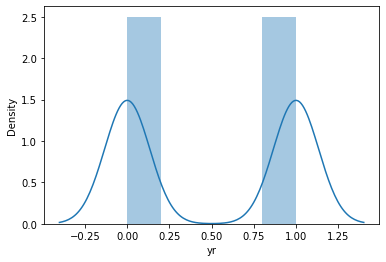

In [4053]:
#year
sns.distplot(bike_df['yr'])

In [4054]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#change year to 2018 and 2019


In [4055]:
def change_year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

#bike_df['yr'] = bike_df['yr'].apply(change_year)

In [4056]:
#change waethersit to string
def change_weathersit(x):
    return x.map({1:'Clear',2:'Mist+Cloudy',3:'Light Snow',4:'Heavy Rain'})

#bike_df['weathersit'] = bike_df[['weathersit']].apply(change_weathersit)

In [4057]:
#check for the changes
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<AxesSubplot:xlabel='workingday', ylabel='Density'>

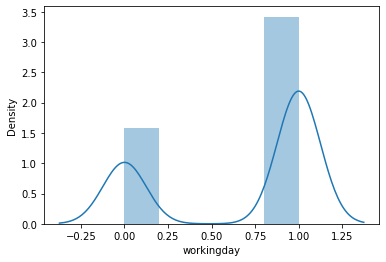

In [4058]:
#working day - Univariate analysis 
sns.distplot(bike_df['workingday'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

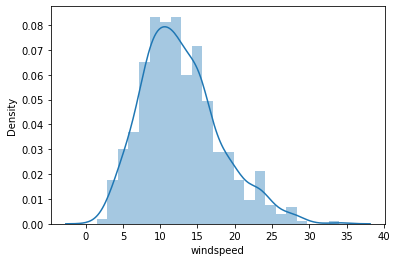

In [4059]:
#temp - univariate analysis
sns.distplot(bike_df['windspeed'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

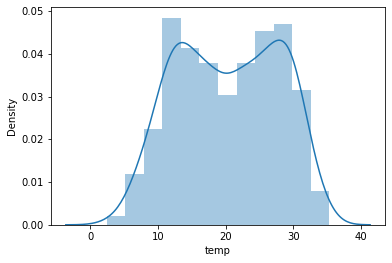

In [4060]:
#temp - univariate analysis
sns.distplot(bike_df['temp'])

<AxesSubplot:xlabel='atemp', ylabel='Density'>

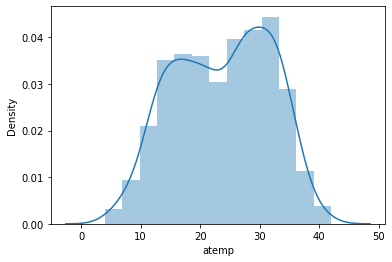

In [4061]:
#atemp..feeling tempearture -univariate analysis
sns.distplot(bike_df['atemp'])

<AxesSubplot:xlabel='hum', ylabel='Density'>

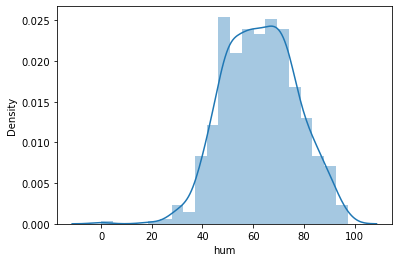

In [4062]:
#humudity -univariate analysis
sns.distplot(bike_df['hum'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

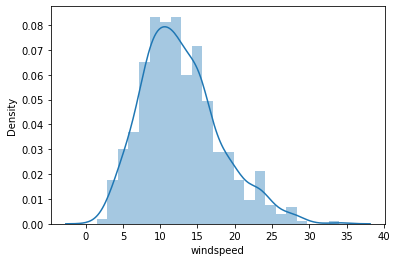

In [4063]:
#windspeed - univariate analysis
sns.distplot(bike_df['windspeed'])

<AxesSubplot:xlabel='cnt', ylabel='Density'>

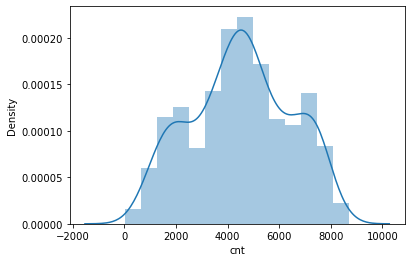

In [4064]:
#cnt -univariate analysis
sns.distplot(bike_df['cnt'])

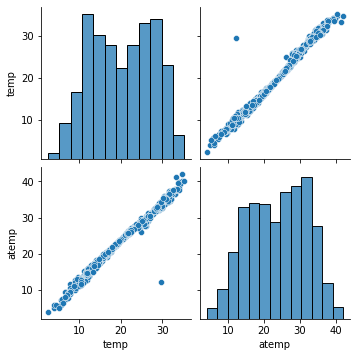

In [4065]:
#check the relationship between temp and atemp - Bivariate analysis
sns.pairplot(bike_df[['temp','atemp']])
plt.show()

From above chart its very much evident that columns temp and atemp are very much correlated to each other
so either temp or atemp can be droped  from the dataframe. so will be droping atemp

In [4066]:
#Drop atemp column
bike_df.drop(['atemp'],axis=1,inplace=True)

In [4067]:
#Check the dataset 
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,2,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,2,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [4068]:
#since yr is already there ,we can drop dteday column
bike_df.drop(['dteday'],axis=1,inplace=True)

In [4069]:
#check the dteday
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,spring,0,Jan,0,Mon,0,2,14.110847,80.5833,10.749882,331,654,985
1,2,spring,0,Jan,0,Tue,0,2,14.902598,69.6087,16.652113,131,670,801
2,3,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [4070]:
#All categorical variables in the dataset
categorical_df=bike_df.select_dtypes(exclude=['float64','datetime64','int64'])
print(categorical_df.columns)

Index(['season', 'mnth', 'weekday'], dtype='object')


### Visualizing categorical variables 

<AxesSubplot:xlabel='yr', ylabel='cnt'>

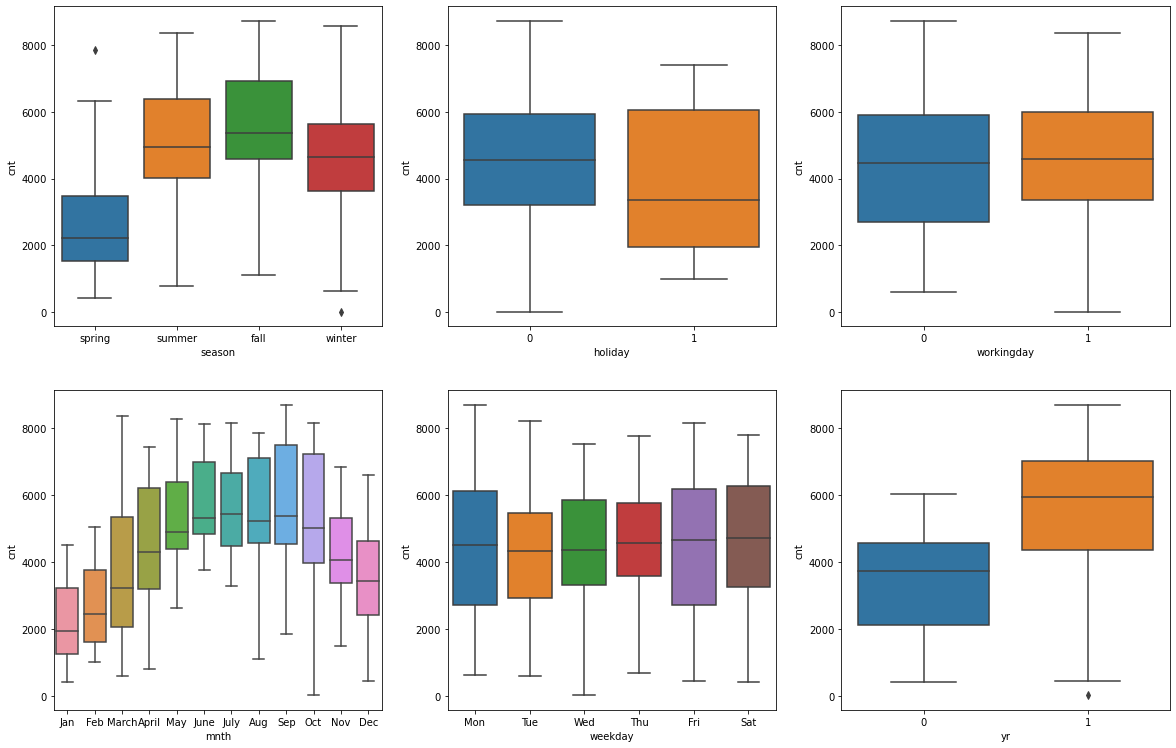

In [4071]:
#Visualize categorical variables present in the dataset
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y = 'cnt',data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday',y = 'cnt',data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday',y = 'cnt',data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth',y = 'cnt',data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday',y = 'cnt',data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr',y = 'cnt',data = bike_df)


### Visualizing Numeric variables

In [4072]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
#IntVariableList = ["casual","registered","cnt"]

#we can  drop casual and registered as target variable cnt is sum of them
#bike_df.drop(['casual','registered'],axis=1,inplace=True)

In [4073]:
#check the dataframe
bike_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,spring,0,Jan,0,Mon,0,2,14.110847,80.5833,10.749882,331,654,985
1,2,spring,0,Jan,0,Tue,0,2,14.902598,69.6087,16.652113,131,670,801
2,3,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [4074]:
#Column instant is not required as its noise ..so drop it
bike_df.drop(['instant'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,0,2,14.110847,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,0,2,14.902598,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [4075]:
# All numeric variables in the dataset
bike_df.info()
numeric_df = bike_df.select_dtypes(include=['float64','int64'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     626 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 74.3+ KB


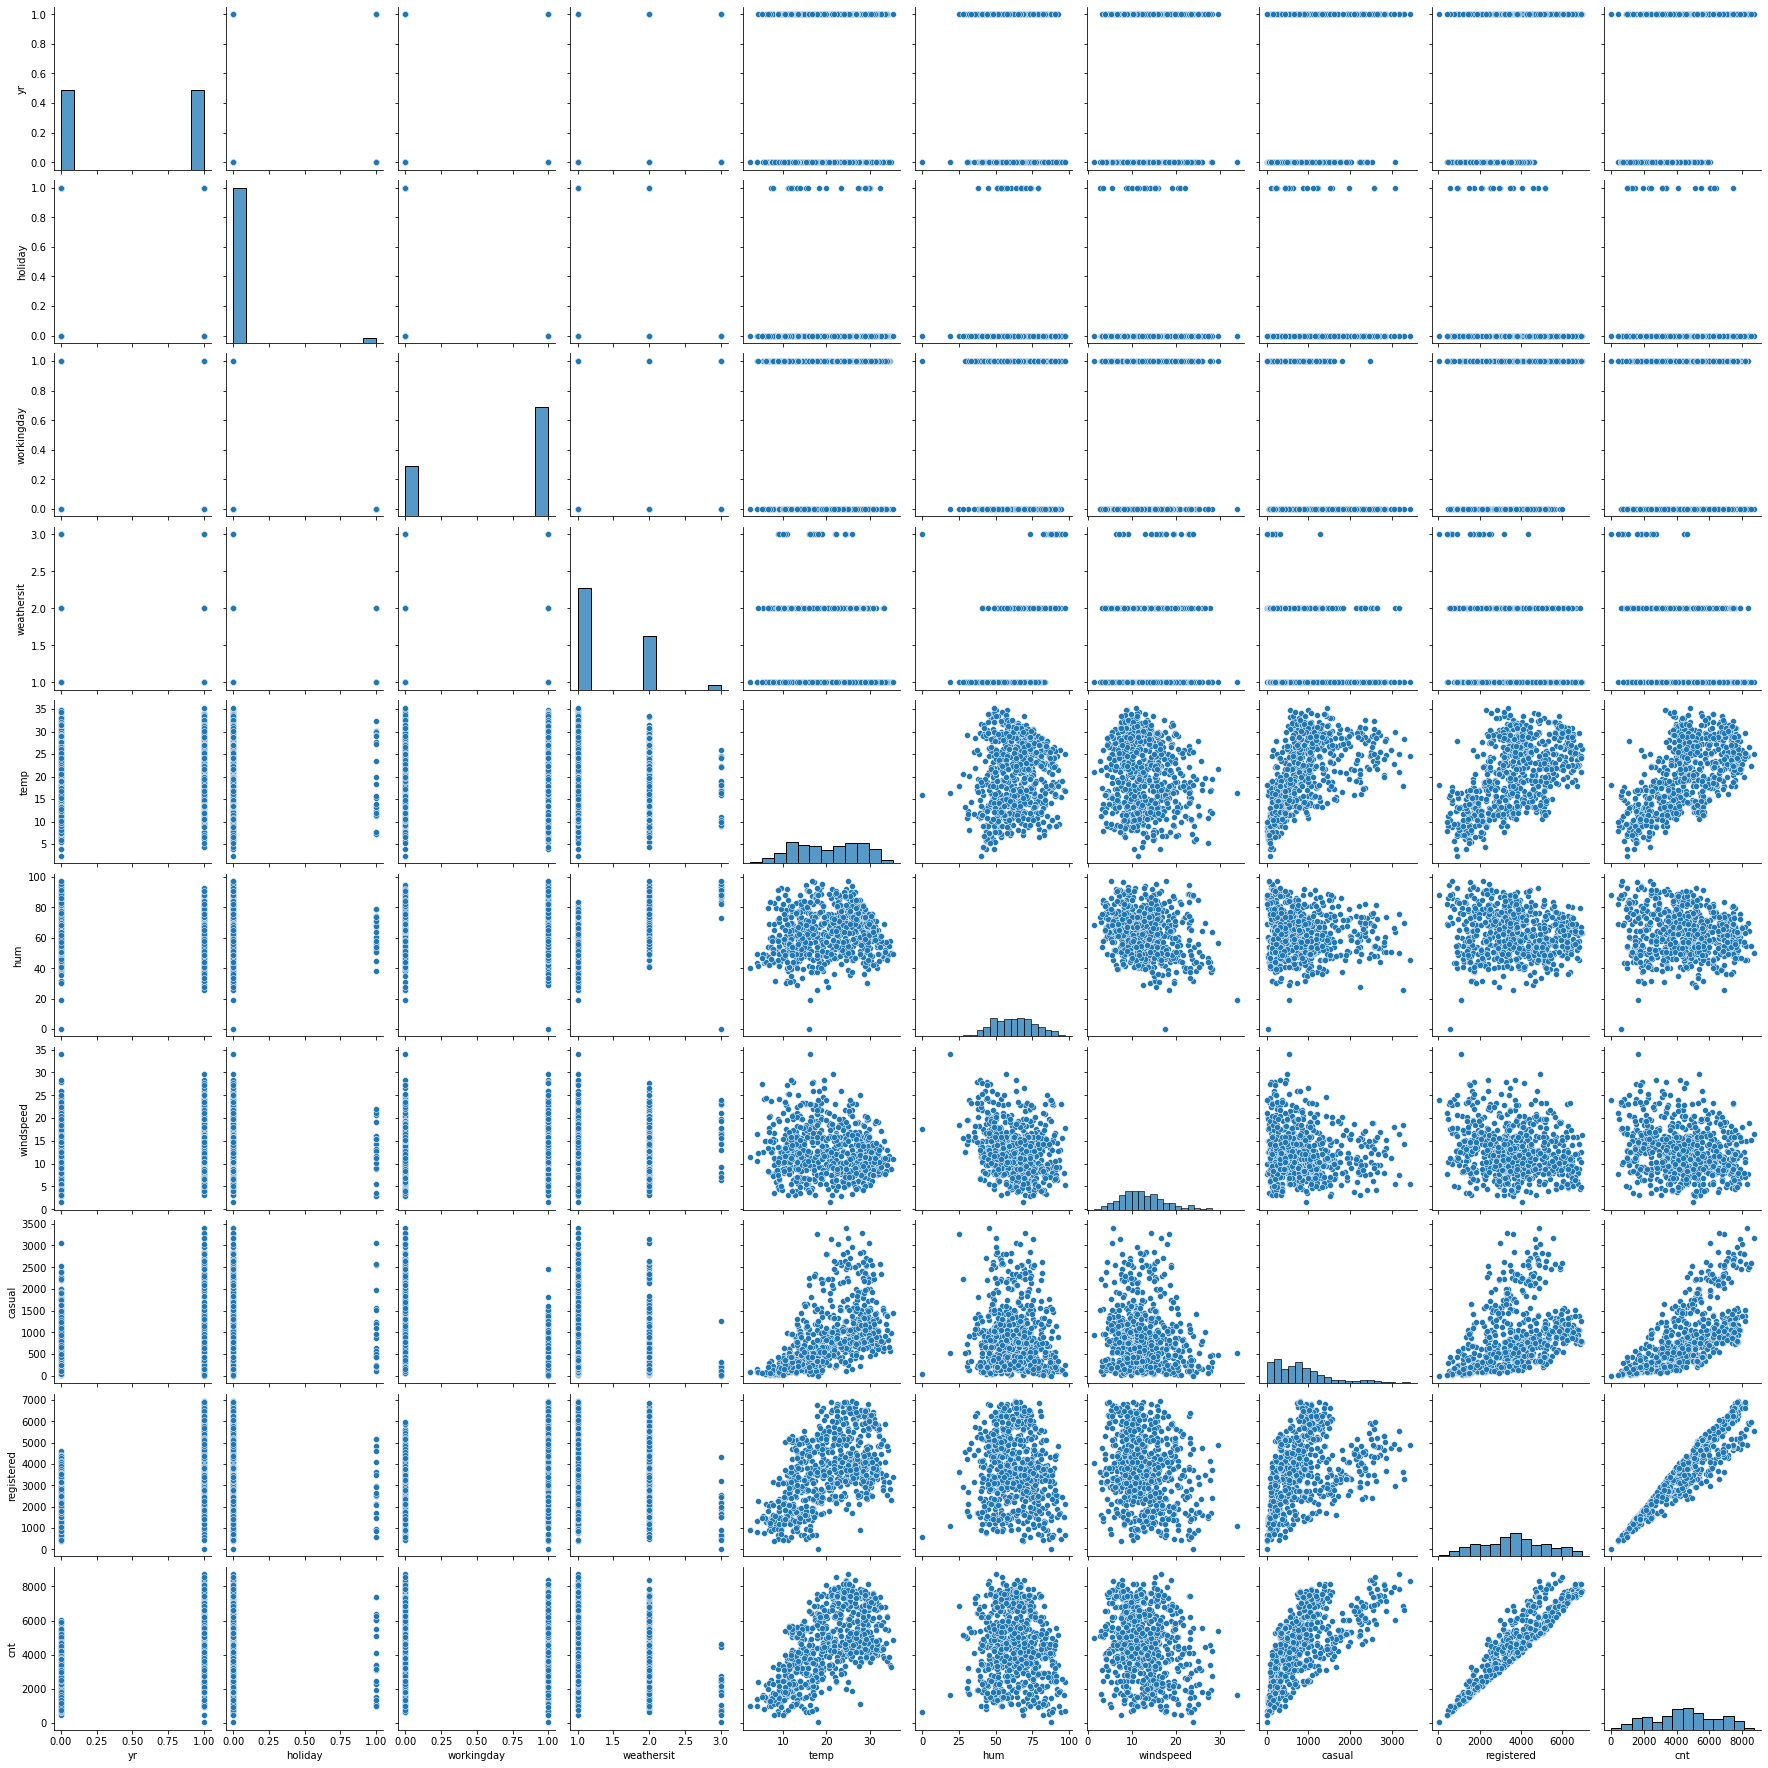

In [4076]:
# Pairwise scatter plot..visualise the numerical variables
sns.pairplot(numeric_df)
plt.show()

In [4077]:
# Correlation matrix
# Correlation matrix
cor = numeric_df.corr()
cor

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
yr,1.000000,0.008195,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.060236,0.053470,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.050322,-0.034395,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.048789,-0.028764,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.542731,0.539436,0.627044
hum,-0.112547,-0.015662,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.517607,-0.246044,0.542731,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.305437,-0.259025,0.539436,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.569728,-0.068764,0.062542,-0.295929,0.627044,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

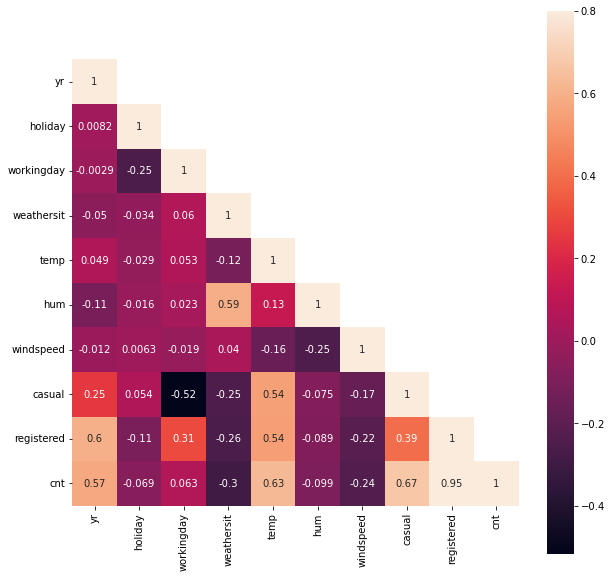

In [4078]:
#Let us plot the correlation on a heatmap for better visualization
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)


In [4079]:
#Data Preparation for modelling
#Let us prepare the data and build the model.
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,0,2,14.110847,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,0,2,14.902598,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,82,1518,1600


## Data Preparation

In [4080]:
# Subset all categorical variables
categorical_df=bike_df.select_dtypes(include=['object'])
#categorical_df.head()
print(categorical_df.columns)

Index(['season', 'mnth', 'weekday'], dtype='object')


### Dummy Variables

In [4081]:
# Dummy variable:  The variable seasson,mnth,weekday and weathersit have different level
# Conver them to integers..So to do, will use dummy variables
# Create dummy variables  on categorical vairables like season,yr,mnth,weekday,weathersit 
# Convert into dummies
# bike_df.info()
bike_df_dummies = pd.get_dummies(categorical_df,drop_first=True)
#bike_df_dummies = pd.get_dummies(categorical_df,drop_first=True)
bike_df_dummies.head()



,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4082]:
bike_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   season_spring  730 non-null    uint8
 1   season_summer  730 non-null    uint8
 2   season_winter  730 non-null    uint8
 3   mnth_Aug       730 non-null    uint8
 4   mnth_Dec       730 non-null    uint8
 5   mnth_Feb       730 non-null    uint8
 6   mnth_Jan       730 non-null    uint8
 7   mnth_July      730 non-null    uint8
 8   mnth_June      730 non-null    uint8
 9   mnth_March     730 non-null    uint8
 10  mnth_May       730 non-null    uint8
 11  mnth_Nov       730 non-null    uint8
 12  mnth_Oct       730 non-null    uint8
 13  mnth_Sep       730 non-null    uint8
 14  weekday_Mon    730 non-null    uint8
 15  weekday_Sat    730 non-null    uint8
 16  weekday_Thu    730 non-null    uint8
 17  weekday_Tue    730 non-null    uint8
 18  weekday_Wed    730 non-null    uint8
dtypes: uint8

In [4083]:
# Drop categorical variable columns
bike_df = bike_df.drop(list(categorical_df.columns), axis=1)

In [4084]:
bike_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   season_spring  730 non-null    uint8
 1   season_summer  730 non-null    uint8
 2   season_winter  730 non-null    uint8
 3   mnth_Aug       730 non-null    uint8
 4   mnth_Dec       730 non-null    uint8
 5   mnth_Feb       730 non-null    uint8
 6   mnth_Jan       730 non-null    uint8
 7   mnth_July      730 non-null    uint8
 8   mnth_June      730 non-null    uint8
 9   mnth_March     730 non-null    uint8
 10  mnth_May       730 non-null    uint8
 11  mnth_Nov       730 non-null    uint8
 12  mnth_Oct       730 non-null    uint8
 13  mnth_Sep       730 non-null    uint8
 14  weekday_Mon    730 non-null    uint8
 15  weekday_Sat    730 non-null    uint8
 16  weekday_Thu    730 non-null    uint8
 17  weekday_Tue    730 non-null    uint8
 18  weekday_Wed    730 non-null    uint8
dtypes: uint8

In [4085]:
# Concatenate dummy variables with original dataframe 
bike_df = pd.concat([bike_df,bike_df_dummies], axis=1)

bike_df.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,0,2,14.110847,80.5833,10.749882,331,654,985,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [4086]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   weathersit     730 non-null    int64  
 4   temp           730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   casual         730 non-null    int64  
 8   registered     730 non-null    int64  
 9   cnt            730 non-null    int64  
 10  season_spring  730 non-null    uint8  
 11  season_summer  730 non-null    uint8  
 12  season_winter  730 non-null    uint8  
 13  mnth_Aug       730 non-null    uint8  
 14  mnth_Dec       730 non-null    uint8  
 15  mnth_Feb       730 non-null    uint8  
 16  mnth_Jan       730 non-null    uint8  
 17  mnth_July      730 non-null    uint8  
 18  mnth_June 

## Model Building and Evaluation

In [4087]:
#Model building and evaluation
#Splitting bike data set into train and test#
#np.random.seed(0)
bike_train,bike_test = train_test_split(bike_df,train_size=0.7,test_size=0.3 ,random_state=100)
print(bike_train.shape)
print(bike_test.shape)


(510, 29)
(219, 29)


In [4088]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   weathersit     510 non-null    int64  
 4   temp           510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   casual         510 non-null    int64  
 8   registered     510 non-null    int64  
 9   cnt            510 non-null    int64  
 10  season_spring  510 non-null    uint8  
 11  season_summer  510 non-null    uint8  
 12  season_winter  510 non-null    uint8  
 13  mnth_Aug       510 non-null    uint8  
 14  mnth_Dec       510 non-null    uint8  
 15  mnth_Feb       510 non-null    uint8  
 16  mnth_Jan       510 non-null    uint8  
 17  mnth_July      510 non-null    uint8  
 18  mnth_June

In [4089]:
#Let us do scalling now..so we need to scale variables for better interpretability but need to scale only numeric variables only
#Also scalling has to be done on only on train dataset as you dont want it to learn anything from test data.
bike_train

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,1,19.201653,55.8333,12.208807,922,6612,7534,...,0,0,0,1,0,0,0,1,0,0
576,1,0,1,1,29.246653,70.4167,11.083475,968,6248,7216,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,2,16.980847,62.1250,10.792293,956,3110,4066,...,1,0,0,0,0,1,0,0,0,0
728,1,0,0,1,10.489153,48.3333,23.500518,364,1432,1796,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,2,15.443347,48.9583,8.708325,1120,3100,4220,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,2,29.554153,58.7917,13.916771,1017,5647,6664,...,0,0,0,0,0,0,0,0,0,1
578,1,0,1,1,30.852500,65.9583,8.666718,983,6278,7261,...,0,0,0,0,0,0,1,0,0,0
53,0,0,1,1,9.091299,42.3043,6.305571,139,1778,1917,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,2,10.591653,56.0833,16.292189,275,2464,2739,...,0,0,0,0,0,1,0,0,0,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [4090]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
#Apply scaller to all columns expect created dummy variables 
#To do so, create list of all scaller variables 

scaller_vars = ['temp','hum','windspeed','casual','registered','cnt']
bike_train[scaller_vars] = scaler.fit_transform(bike_train[scaller_vars])
#display the dataset
bike_train.head()


,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,0,0,1,0,0,0,1,0,0
576,1,0,1,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,2,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,...,1,0,0,0,0,1,0,0,0,0
728,1,0,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,2,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,1,0,0,0,0


In [4091]:
bike_train.describe()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,...,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,1.401961,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.547540,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,2.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


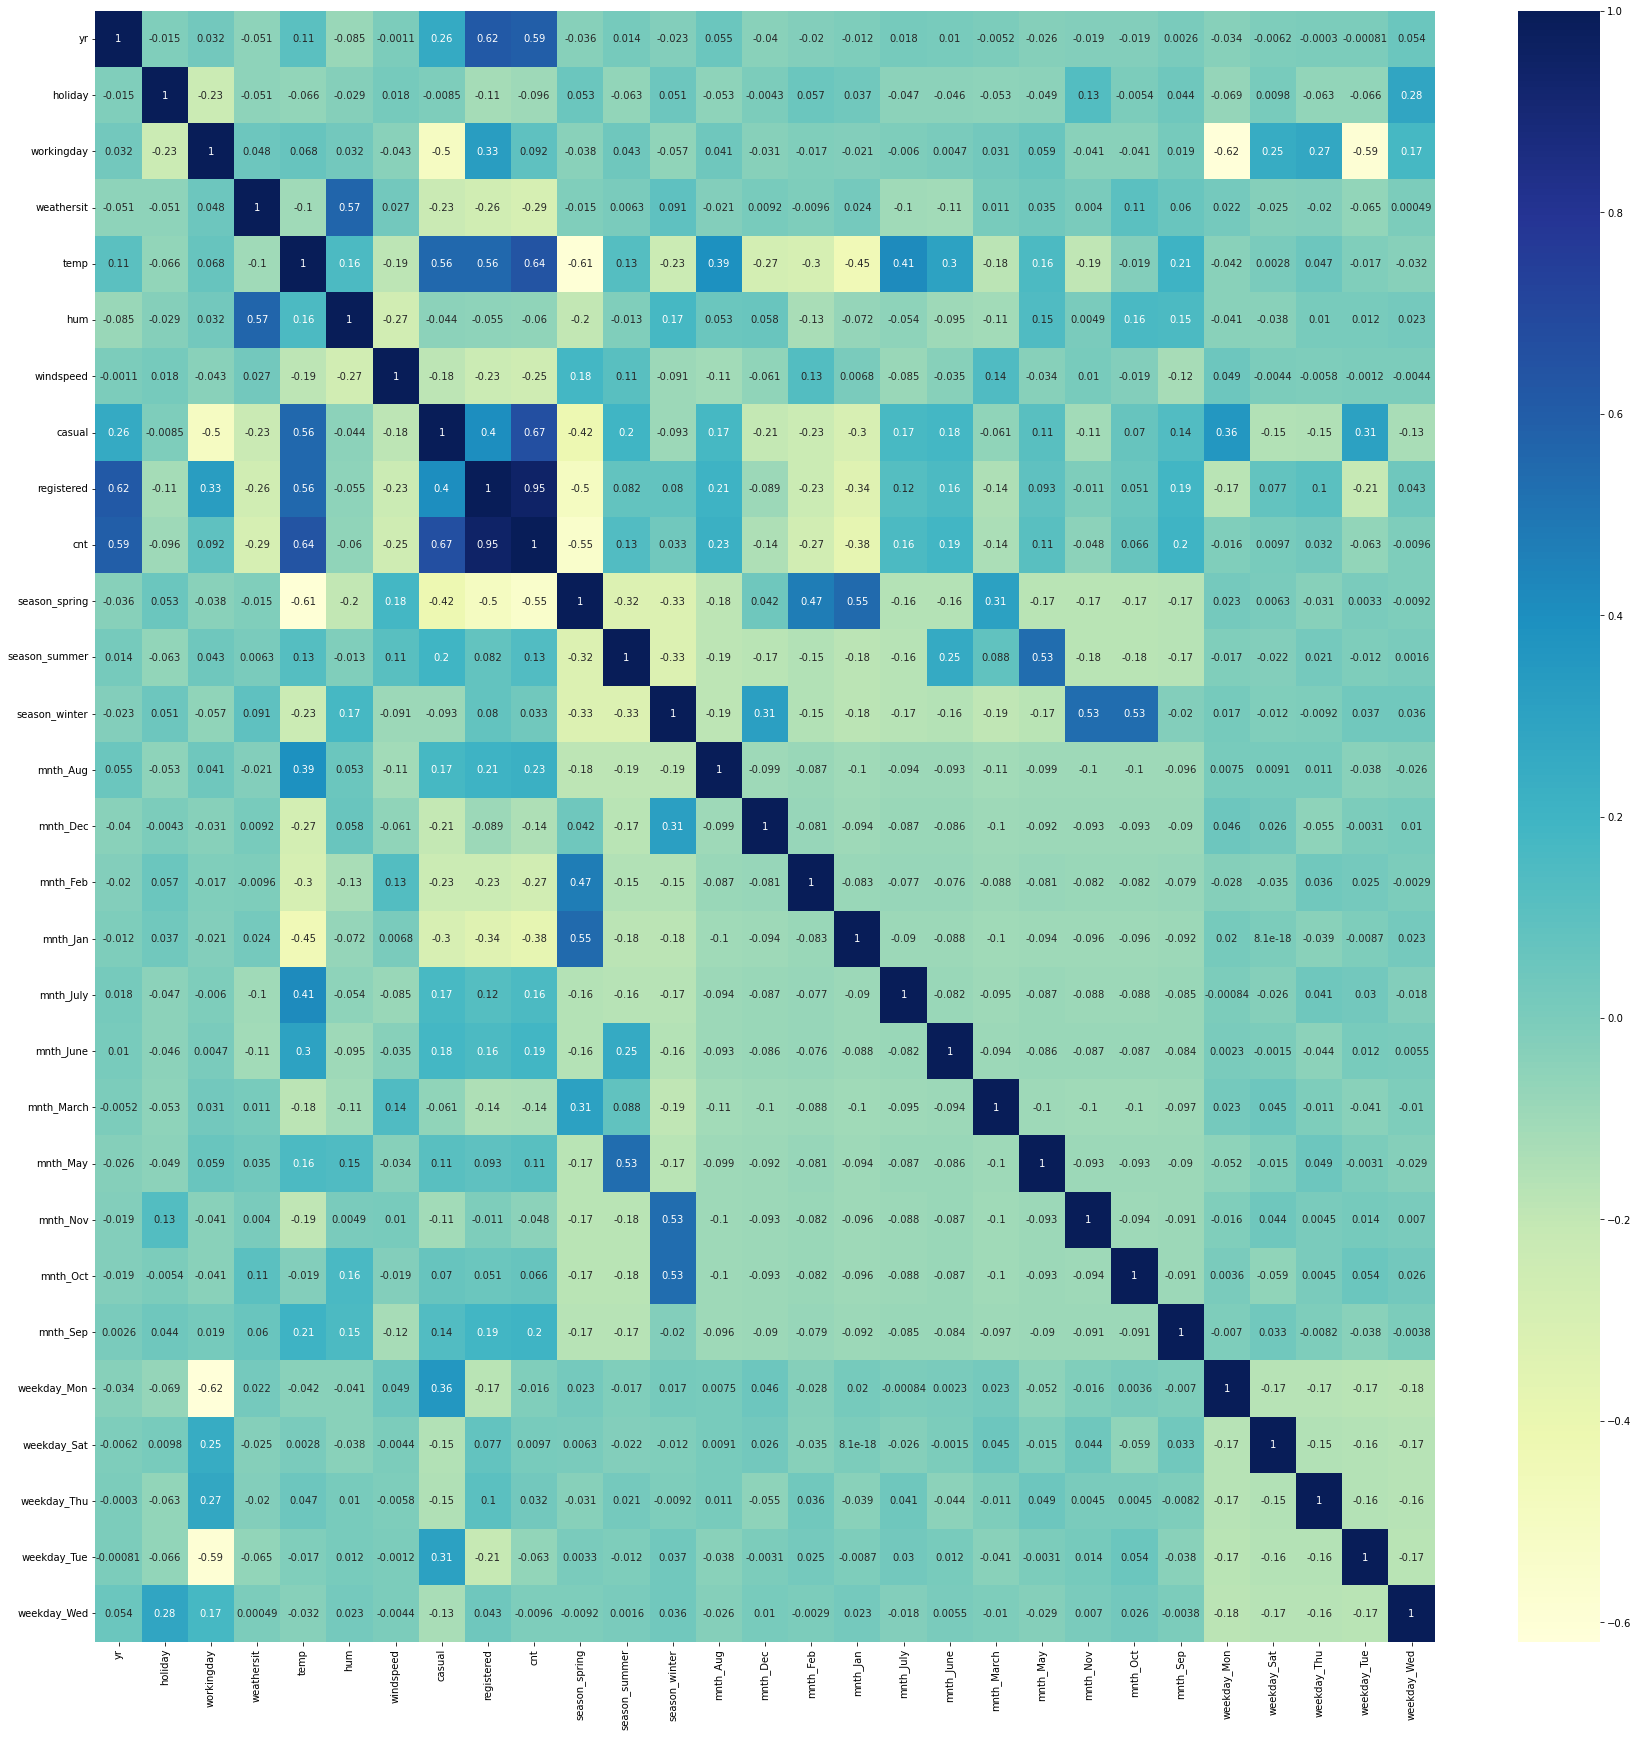

In [4092]:
# Let's plot  correlation coefficients for bike_trai data to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


From the above chart, its evident that temp seems to be correlated with cnt most.so draw pair plot between them

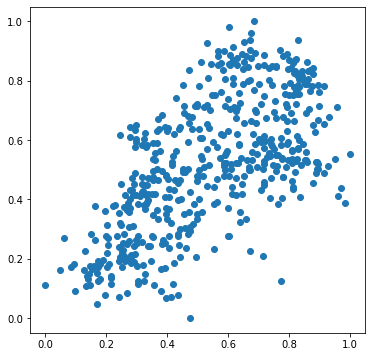

In [4093]:
#Looks like temp is correlated to cnt most..so let us pairplot of temp Vs cnt
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp,bike_train.cnt)
plt.show()

### Dividing into X and Y sets for model building

In [4094]:
# Now dividing into X and Y sets for the  model building
#build the model now

#y_train.drop(['cnt'],axis=1)
y_train = bike_train.pop('cnt')
X_train = bike_train.drop(["casual","registered"],axis=1) 
# Check X training set 
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   weathersit     510 non-null    int64  
 4   temp           510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   season_spring  510 non-null    uint8  
 8   season_summer  510 non-null    uint8  
 9   season_winter  510 non-null    uint8  
 10  mnth_Aug       510 non-null    uint8  
 11  mnth_Dec       510 non-null    uint8  
 12  mnth_Feb       510 non-null    uint8  
 13  mnth_Jan       510 non-null    uint8  
 14  mnth_July      510 non-null    uint8  
 15  mnth_June      510 non-null    uint8  
 16  mnth_March     510 non-null    uint8  
 17  mnth_May       510 non-null    uint8  
 18  mnth_Nov 

In [4095]:
X_train.shape



(510, 26)

In [4096]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(bike_train)

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [4097]:
#Check the statistical signifiance of variables
#VIF


### Building the first model with all features 

In [4098]:
#Building the first model with all features
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.311070
yr               0.233874
holiday          0.026247
workingday       0.111545
weathersit      -0.083424
temp             0.446607
hum             -0.142653
windspeed       -0.195357
season_spring   -0.043060
season_summer    0.043321
season_winter    0.109437
mnth_Aug         0.021476
mnth_Dec        -0.045818
mnth_Feb        -0.034060
mnth_Jan        -0.060304
mnth_July       -0.039624
mnth_June       -0.002197
mnth_March      -0.000593
mnth_May         0.027802
mnth_Nov        -0.044585
mnth_Oct        -0.000689
mnth_Sep         0.082958
weekday_Mon      0.113486
weekday_Sat     -0.009347
weekday_Thu     -0.014760
weekday_Tue      0.059792
weekday_Wed     -0.017957
dtype: float64

In [4099]:
#summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.20e-178
Time:                        21:14:42   Log-Likelihood:                 515.25
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     484   BIC:                            -868.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3111      0.036      8.739

In [4100]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [4101]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)        

[ 2.33873619e-01  7.89795504e+12  7.89795504e+12 -9.01075990e-02
  4.94797022e-01 -1.21846208e-01 -1.78731555e-01 -1.10365560e-01
 -2.48571867e-02  5.18711082e-02 -5.57241942e-02 -3.21725587e-02
 -3.85727938e-02 -1.63332243e-02 -1.30195037e-01 -5.19892040e-03
  9.77078364e-03  3.46112921e-02 -2.85140683e-02 -1.18703632e-02
  3.32712557e-02  7.89795504e+12  2.72619522e-02 -4.23537032e-02
  7.89795504e+12  4.53111231e-03]
-7897955035606.742


In [4102]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.20e-178
Time:                        21:14:43   Log-Likelihood:                 515.25
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     484   BIC:                            -868.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3111      0.036      8.739      0.000       0.241       0.381
yr                0.2339      0.008     28.415      0.000       0.218       0.250
holiday           0.0262      0.024      1.087      0.278      -0.021       0.074
workingday        0.1115      0.012      9.633      0.000       0.089       0.134
weathersit       -0.0834      0.010     -8.716      0.000      -0.102      -0.065
temp              0.4466      0.047      9.433      0.000       0.354       0.540
hum              -0.1427      0.039     -3.632      0.000      -0.220      -0.065
windspeed        -0.1954      0.026     -7.450      0.000      -0.247      -0.144
season_spring    -0.0431      0.031     -1.406      0.160      -0.103       0.017
season_summer     0.0433      0.027      1.618      0.106      -0.009       0.096
season_winter     0.1094      0.029      3.835      0.000       0.053       0.166
mnth_Aug          0.0215      0.034      0.624      0.533      -0.046       0.089
mnth_Dec         -0.0458      0.034     -1.334      0.183      -0.113       0.022
mnth_Feb         -0.0341      0.034     -1.013      0.312      -0.100       0.032
mnth_Jan         -0.0603      0.034     -1.758      0.079      -0.128       0.007
mnth_July        -0.0396      0.036     -1.105      0.270      -0.110       0.031
mnth_June        -0.0022      0.026     -0.086      0.932      -0.053       0.048
mnth_March       -0.0006      0.025     -0.024      0.981      -0.050       0.049
mnth_May          0.0278      0.021      1.295      0.196      -0.014       0.070
mnth_Nov         -0.0446      0.037     -1.200      0.231      -0.118       0.028
mnth_Oct         -0.0007      0.037     -0.019      0.985      -0.073       0.071
mnth_Sep          0.0830      0.033      2.535      0.012       0.019       0.147
weekday_Mon       0.1135      0.014      8.354      0.000       0.087       0.140
weekday_Sat      -0.0093      0.013     -0.699      0.485      -0.036       0.017
weekday_Thu      -0.0148      0.013     -1.099      0.272      -0.041       0.012
weekday_Tue       0.0598      0.014      4.395      0.000       0.033       0.087
weekday_Wed      -0.0180      0.013     -1.356      0.176      -0.044       0.008
==============================================================================
Omnibus:                       84.273   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.814
Skew:                          -0.777   Prob(JB):                     1.27e-55
Kurtosis:                       6.079   Cond. No.                     9.98e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-29. This mig

## Model building using REF
#### Now we have more than 25 features and its going to take big amount of time to eliminate one by one to build right module. Hence manual elimation of features not recommended. So need to build the model using method called REF,Recursive elimination of feature.We will start with minimum 15 features and then use statsmodel library to build the model using shorted listed features.

In [4103]:
RFE
#start with 15 features
lm = LinearRegression() #Object instantiation

feature_rfe = RFE(lm,n_features_to_select=20)
#fit with 20 features
feature_rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=20)

## Now Model building and Evaluation 

In [4104]:
#subset of features selected by feature_ref
cols1 = X_train.columns[feature_rfe.support_]

#subsetting for 20 selected features
X_train_f20 = X_train[cols1]

#Add constant to the model
X_train_f20 = sm.add_constant(X_train_f20)
X_train_f20.head()

,const,yr,holiday,workingday,weathersit,temp,hum,windspeed,season_spring,season_summer,...,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_May,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Tue
653,1.0,1,0,1,1,0.509887,0.575354,0.300794,0,0,...,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,1,0.815169,0.725633,0.264686,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,2,0.442393,0.640189,0.255342,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0,1,0.245101,0.498067,0.663106,1,0,...,0,1,0,0,0,0,0,0,0,1
482,1.0,1,0,0,2,0.395666,0.504508,0.188475,0,1,...,0,0,0,0,0,0,0,0,1,0


In [4105]:
#fitting the model with 20 features
lm1 = sm.OLS(y_train,X_train_f20).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.88e-184
Time:                        21:14:43   Log-Likelihood:                 514.01
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     490   BIC:                            -903.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3055      0.032      9.500

In [4106]:
RFE
#start with 15 features
lm = LinearRegression() #Object instantiation

feature_rfe15 = RFE(lm,n_features_to_select=15)
#fit with 15 features       
feature_rfe15.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [4107]:
#subset of features selected by feature_ref
cols1 = X_train.columns[feature_rfe15.support_]

#subsetting for 15 selected features
X_train_f15 = X_train[cols1]

#Add constant to the model
X_train_f15 = sm.add_constant(X_train_f15)
X_train_f15.head()

,const,yr,holiday,workingday,weathersit,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weekday_Mon
653,1.0,1,0,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1.0,1,0,1,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0
426,1.0,1,0,0,2,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,0,1,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0
482,1.0,1,0,0,2,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1


In [4108]:
#fitting the model with 20 features
lm1 = sm.OLS(y_train,X_train_f15).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.87e-186
Time:                        21:14:44   Log-Likelihood:                 506.97
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     494   BIC:                            -914.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4108      0.032     12.647

In [4109]:
RFE
#start with 10 features
lm = LinearRegression() #Object instantiation

feature_rfe10 = RFE(lm,n_features_to_select=10)
#fit with 10 features       
feature_rfe10.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [4110]:
#subset of features selected by feature_ref
cols1 = X_train.columns[feature_rfe10.support_]

#subsetting for 10 selected features
X_train_f10 = X_train[cols1]

#Add constant to the model
X_train_f10 = sm.add_constant(X_train_f10)
X_train_f10.head()

,const,yr,holiday,weathersit,temp,hum,windspeed,season_spring,season_winter,mnth_July,mnth_Sep
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,1,0
426,1.0,1,0,2,0.442393,0.640189,0.255342,1,0,0,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,0
482,1.0,1,0,2,0.395666,0.504508,0.188475,0,0,0,0


In [4111]:
#fitting the model with 20 features
lm1 = sm.OLS(y_train,X_train_f10).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.02e-185
Time:                        21:14:45   Log-Likelihood:                 492.47
No. Observations:                 510   AIC:                            -962.9
Df Residuals:                     499   BIC:                            -916.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4206      0.030     13.809

In [4112]:
RFE
#start with 07 features
lm = LinearRegression() #Object instantiation

feature_rfe07 = RFE(lm,n_features_to_select=7)
#fit with 10 features       
feature_rfe07.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [4113]:
#subset of features selected by feature_ref
cols1 = X_train.columns[feature_rfe07.support_]

#subsetting for 07 selected features
X_train_f07 = X_train[cols1]

#Add constant to the model
X_train_f07 = sm.add_constant(X_train_f07)
X_train_f07.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,mnth_July
653,1.0,1,0,0.509887,0.575354,0.300794,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,1
426,1.0,1,0,0.442393,0.640189,0.255342,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0


In [4114]:
#fitting the model with 20 features
lm1 = sm.OLS(y_train,X_train_f07).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.61e-170
Time:                        21:14:46   Log-Likelihood:                 446.26
No. Observations:                 510   AIC:                            -876.5
Df Residuals:                     502   BIC:                            -842.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4662      0.031     15.225

### Check for VIF values for selected feature

##### Note that the new model built on the selected features(15-20) doesn't show much dip in the accuracy in comparison to the model which was built on all the features. R-Squared has gone from **84.6%** to **84.1%**. Also on the selected features, p-value also look good and withink the range for the most of the features. This is indeed a good indication to proceed with these selected features.
##### But let's check for the multicollinearity among these variables.

#### Check for the VIF value of the feature variables. 

In [4115]:
a=X_train_f20.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,66.81
18,weekday_Mon,16.12
19,weekday_Tue,14.91
7,season_spring,8.52
8,season_summer,6.55
9,season_winter,6.28
4,temp,4.91
1,holiday,3.59
10,mnth_Aug,3.15
14,mnth_July,2.80


In [4116]:
a=X_train_f10.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.52
3,temp,13.43
2,weathersit,12.50
5,windspeed,4.20
6,season_spring,2.37
0,yr,2.05
7,season_winter,2.00
8,mnth_July,1.39
9,mnth_Sep,1.20
1,holiday,1.04


In [4117]:
a=X_train_f15.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,31.68
4,temp,15.73
3,weathersit,12.76
2,workingday,5.30
6,windspeed,4.35
8,season_winter,2.92
7,season_spring,2.87
0,yr,2.07
14,weekday_Mon,1.98
12,mnth_Nov,1.81


In [4118]:
a=X_train_f10.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.52
3,temp,13.43
2,weathersit,12.50
5,windspeed,4.20
6,season_spring,2.37
0,yr,2.05
7,season_winter,2.00
8,mnth_July,1.39
9,mnth_Sep,1.20
1,holiday,1.04


In [4119]:
a=X_train_f07.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.00
3,hum,9.90
4,windspeed,3.86
0,yr,2.03
5,season_spring,1.76
6,mnth_July,1.35
1,holiday,1.03


In [4120]:
a=X_train_f07.drop('const',axis=1)

In [4121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.00
3,hum,9.90
4,windspeed,3.86
0,yr,2.03
5,season_spring,1.76
6,mnth_July,1.35
1,holiday,1.03


### From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

### So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [4122]:
# Let's drop the 'hum' column
X_train_f20.drop("hum",axis=1,inplace=True)
X_train_f20

,const,yr,holiday,workingday,weathersit,temp,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_May,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Tue
653,1.0,1,0,1,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1.0,1,0,1,1,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,2,0.442393,0.255342,1,0,0,0,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0,1,0.245101,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,1
482,1.0,1,0,0,2,0.395666,0.188475,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,2,0.824514,0.355596,0,1,0,0,0,0,0,0,0,0,0,0,0
578,1.0,1,0,1,1,0.863973,0.187140,0,0,0,1,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,1,0.202618,0.111379,1,0,0,0,0,1,0,0,0,0,0,0,0
350,1.0,0,0,0,2,0.248216,0.431816,0,0,1,0,1,0,0,0,0,0,0,1,0


In [4123]:
X_train_f20 = sm.add_constant(X_train_f20)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_f20).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     143.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.67e-182
Time:                        21:14:48   Log-Likelihood:                 506.69
No. Observations:                 510   AIC:                            -975.4
Df Residuals:                     491   BIC:                            -894.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2702      0.031      8.665

In [4124]:
a=X_train_f20.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,61.17
17,weekday_Mon,14.92
18,weekday_Tue,13.55
6,season_spring,8.45
7,season_summer,6.51
8,season_winter,6.10
4,temp,4.63
1,holiday,3.37
9,mnth_Aug,3.14
13,mnth_July,2.80


Few the VIF values are not in permissible range though d p-values seem to be in the permissible range now. Also the `Adjusted R-squared and R-Sqaured` value has dropped from `83.8% and 84.6%` with **26 variables** to just `83.6% and 84.1%` using **20 variables**. To use this need to deal with few of the variables.So not recommended  

In [4125]:
# Let's drop the 'hum' column
X_train_f15.drop("hum",axis=1,inplace=True)
X_train_f15

,const,yr,holiday,workingday,weathersit,temp,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weekday_Mon
653,1.0,1,0,1,1,0.509887,0.300794,0,1,0,0,0,0,0,0
576,1.0,1,0,1,1,0.815169,0.264686,0,0,0,0,1,0,0,0
426,1.0,1,0,0,2,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,0,1,0.245101,0.663106,1,0,1,0,0,0,0,0
482,1.0,1,0,0,2,0.395666,0.188475,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,2,0.824514,0.355596,0,0,0,0,0,0,0,0
578,1.0,1,0,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,1,1,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0,0,2,0.248216,0.431816,0,1,1,0,0,0,0,1


In [4126]:
X_train_f15 = sm.add_constant(X_train_f15)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_f15).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.25e-185
Time:                        21:14:48   Log-Likelihood:                 501.51
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     495   BIC:                            -909.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3626      0.029     12.408

In [4127]:
a=X_train_f15.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,8.27
3,weathersit,6.64
2,workingday,5.27
5,windspeed,4.32
7,season_winter,2.66
6,season_spring,2.60
0,yr,2.06
13,weekday_Mon,1.98
11,mnth_Nov,1.80
9,mnth_Jan,1.68


Few the VIF values are not in permissible range though p-values seem to be in the permissible range now. Also the `Adjusted R-squared and R-Sqaured` value has dropped from `83.8% and 84.6%` with **26 variables** to just `83.6% and 84.1%` using **15 variables**. To use this need to deal with few of the variables.So not recommended  

In [4128]:
# Let's drop the 'hum' column
X_train_f10.drop("hum",axis=1,inplace=True)
X_train_f10

,const,yr,holiday,weathersit,temp,windspeed,season_spring,season_winter,mnth_July,mnth_Sep
653,1.0,1,0,1,0.509887,0.300794,0,1,0,0
576,1.0,1,0,1,0.815169,0.264686,0,0,1,0
426,1.0,1,0,2,0.442393,0.255342,1,0,0,0
728,1.0,1,0,1,0.245101,0.663106,1,0,0,0
482,1.0,1,0,2,0.395666,0.188475,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,2,0.824514,0.355596,0,0,0,0
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,1,0,0,0
350,1.0,0,0,2,0.248216,0.431816,0,1,0,0


In [4129]:
X_train_f10 = sm.add_constant(X_train_f10)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_f10).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.07e-184
Time:                        21:14:49   Log-Likelihood:                 485.23
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     500   BIC:                            -908.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3634      0.027     13.558

In [4130]:
a=X_train_f10.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.44
2,weathersit,6.15
4,windspeed,4.17
0,yr,2.05
5,season_spring,1.88
6,season_winter,1.57
7,mnth_July,1.36
8,mnth_Sep,1.20
1,holiday,1.04


Few the VIF values are not in permissible range though d p-values seem to be in the permissible range now. Also the `Adjusted R-squared and R-Sqaured` value has dropped from `83.8% and 84.6%` with **26 variables** to just `82.8% and 83.1%` using **10 variables**. To use this need to deal with few of the variables.So not recommended  

In [4131]:
# Let's drop the 'hum' column
X_train_f07.drop("hum",axis=1,inplace=True)
X_train_f07

,const,yr,holiday,temp,windspeed,season_spring,mnth_July
653,1.0,1,0,0.509887,0.300794,0,0
576,1.0,1,0,0.815169,0.264686,0,1
426,1.0,1,0,0.442393,0.255342,1,0
728,1.0,1,0,0.245101,0.663106,1,0
482,1.0,1,0,0.395666,0.188475,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,1,0
350,1.0,0,0,0.248216,0.431816,0,0


In [4132]:
X_train_f07 = sm.add_constant(X_train_f07)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_f07).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     270.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          9.42e-154
Time:                        21:14:50   Log-Likelihood:                 405.74
No. Observations:                 510   AIC:                            -797.5
Df Residuals:                     503   BIC:                            -767.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2487      0.021     11.636

In [4133]:
a=X_train_f07.drop('const',axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.95
3,windspeed,3.65
0,yr,2.02
4,season_spring,1.49
5,mnth_July,1.26
1,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared and R-Sqaured` value has dropped from `83.8% and 84.6%` with **26 variables** to just `79.5% and 79.8%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

## Residual Analysis

##### Before we make predictions on the test set, let's first analyse the residuals.

In [4134]:
y_train_cnt = lm3.predict(X_train_f07)

Text(0.5, 0, 'Errors')

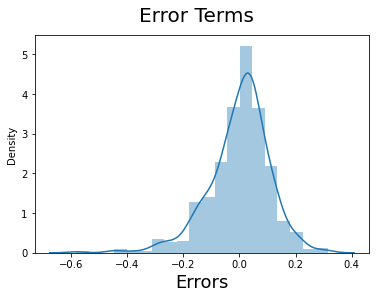

In [4135]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)    

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [4136]:
X_train_f07

,const,yr,holiday,temp,windspeed,season_spring,mnth_July
653,1.0,1,0,0.509887,0.300794,0,0
576,1.0,1,0,0.815169,0.264686,0,1
426,1.0,1,0,0.442393,0.255342,1,0
728,1.0,1,0,0.245101,0.663106,1,0
482,1.0,1,0,0.395666,0.188475,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,1,0
350,1.0,0,0,0.248216,0.431816,0,0


In [4137]:
#scaller_vars
bike_test[scaller_vars] = scaler.transform(bike_test[scaller_vars])

In [4138]:
# Split the 'bike_test' set into X and y after scaling
y_test = bike_test.pop('cnt')
X_test = bike_test.drop(["casual","registered"],axis=1)
X_test.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed
184,0,1,0,2,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,2,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,1,0,0,1,0,0,0
221,0,0,1,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [4139]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=a.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'mnth_July'], dtype='object')

In [4140]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [4141]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   mnth_July      219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 10.7 KB


In [4142]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

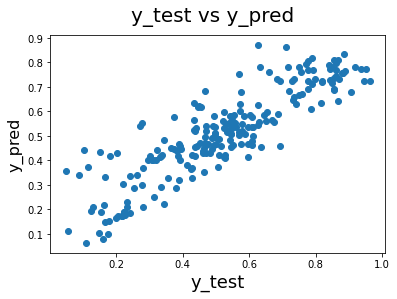

In [4143]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

From the above scatter plot, it's evident that the model looks good and also doing well on the test set as well. Now check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [4144]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7613961922619309

#### Checking the correlations between the final predictor variables

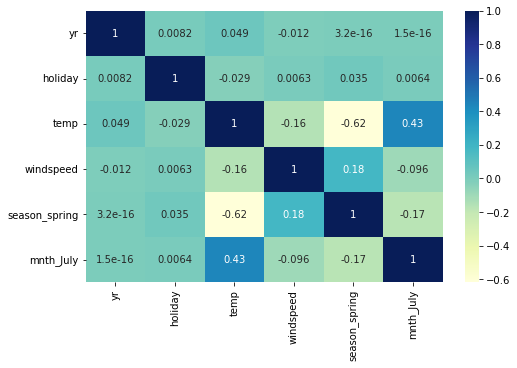

In [4145]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_df[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()